# Análisis y Predicción de Precios de Autos (Core)

**Objetivo:** Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

**Dataset:** Automobile Dataset

**Descripción del Dataset:** Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

## **Instrucciones:**

**Parte 1: Análisis Exploratorio de Datos (EDA)**

 1. Carga y Exploración de Datos:

    * Cargar el dataset y revisar la estructura básica.
    * Descripción de las variables y su distribución.
    * Detección y tratamiento de valores nulos.
    * Identificación y tratamiento de outliers.
    * Análisis de correlación entre variables.

**Parte 2: Preparación de Datos**

 1. Preprocesamiento:
    * Selección de características importantes.
    * Transformación de variables categóricas.
    * División del conjunto de datos en entrenamiento y prueba.
    * Escalado de características.

**Parte 3: Modelos de Regresión**

 1. Regresión Lineal:
    * Entrenamiento del modelo.
    * Evaluación del rendimiento (MSE y R²).
 
1. K-Nearest Neighbors (KNN):
   * Entrenamiento del modelo.
   * Evaluación del rendimiento (MSE y R²).

 2. Árbol de Decisión:
  * Entrenamiento del modelo.
  * Evaluación del rendimiento (MSE y R²).
  
**Parte 4: Benchmarking y Comparación de Modelos**

 1. Comparación de Modelos:
   * Comparar los resultados de los tres modelos en términos de MSE y R².
   * Discusión sobre las diferencias en el rendimiento de los modelos.
   * Conclusión

 2. Interpretación de Resultados:
   * Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
   * Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.
   * Tareas Adicionales y Desafíos

 3. Desafíos Adicionales:

   * Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
   * Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
   * Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.
   * Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

## **Parte 1: Análisis Exploratorio de Datos (EDA)**

 **1. Carga y Exploración de Datos:**

 * Cargar el dataset y revisar la estructura básica.
 * Descripción de las variables y su distribución.
 * Detección y tratamiento de valores nulos.
 * Identificación y tratamiento de outliers.
 * Análisis de correlación entre variables.


 ### **Cargar el dataset y revisar la estructura básica.**
 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from utils import calculate_null
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [39]:
# Cargar datos desde un archivo CSV
df = pd.read_csv(r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_2_machine_learning\2_analisis_y_prediccion_de_autos\data\automobile_data.csv')
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


### **Descripción de las variables y su distribución.**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [41]:
# Renombrar columnas del dataset
df.columns = (
    df.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [42]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [43]:
# Filtrar las columnas categóricas
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Obtener los valores únicos de las columnas categóricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()  # Línea en blanco para separar los resultados


Valores únicos en la columna 'normalized_losses':
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Valores únicos en la columna 'make':
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Valores únicos en la columna 'fuel_type':
['gas' 'diesel']

Valores únicos en la columna 'aspiration':
['std' 'turbo']

Valores únicos en la columna 'num_of_doors':
['two' 'four' '?']

Valores únicos en la columna 'body_style':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Valores únicos en la columna 'drive_wheels':
['rwd' 'fwd' '4wd']

Valores únicos en la columna 'engine_locat

In [44]:
def limpiar_columnas_categoricas(df, columnas):
    """
    Limpia valores no deseados en columnas categóricas de un DataFrame.
    Reemplaza valores como '?' o cadenas vacías por NaN y asegura consistencia.

    Parámetros:
    - df (DataFrame): El DataFrame que contiene las columnas a limpiar.
    - columnas (list): Lista de las columnas categóricas a limpiar.

    Retorna:
    - DataFrame: El DataFrame con las columnas categóricas limpiadas.
    """
    for col in columnas:
        if col in df.columns:
            # Reemplazar valores indeseados ('?' y '') por NaN
            df[col] = df[col].replace(['?', ''], np.nan)
            # Convertir la columna a tipo 'category' para mantener consistencia
            df[col] = df[col].astype('category')
    return df

categorical_cols = df.select_dtypes(include=['category', 'object']).columns

df = limpiar_columnas_categoricas(df, categorical_cols)

# Obtener los valores únicos de las columnas categóricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()  # Línea en blanco para separar los resultados

Valores únicos en la columna 'normalized_losses':
[NaN, '164', '158', '192', '188', ..., '197', '90', '94', '256', '95']
Length: 52
Categories (51, object): ['101', '102', '103', '104', ..., '93', '94', '95', '98']

Valores únicos en la columna 'make':
['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', ..., 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Length: 22
Categories (22, object): ['alfa-romero', 'audi', 'bmw', 'chevrolet', ..., 'subaru', 'toyota', 'volkswagen', 'volvo']

Valores únicos en la columna 'fuel_type':
['gas', 'diesel']
Categories (2, object): ['diesel', 'gas']

Valores únicos en la columna 'aspiration':
['std', 'turbo']
Categories (2, object): ['std', 'turbo']

Valores únicos en la columna 'num_of_doors':
['two', 'four', NaN]
Categories (2, object): ['four', 'two']

Valores únicos en la columna 'body_style':
['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
Categories (5, object): ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']

Valores único

In [45]:
data_dict = {
    'symboling': 'int64',
    'normalized_losses': 'float64',
    'make': 'category',
    'fuel_type': 'category',
    'aspiration': 'category',
    'num_of_doors': 'category',
    'body_style': 'category',
    'drive_wheels': 'category',
    'engine_location': 'category',
    'wheel_base': 'float64',
    'length': 'float64',
    'width': 'float64',
    'height': 'float64',
    'curb_weight': 'int64',
    'engine_type': 'category',
    'num_of_cylinders': 'category',
    'engine_size': 'int64',
    'fuel_system': 'category',
    'bore': 'float64',
    'stroke': 'float64',
    'compression_ratio': 'float64',
    'horsepower': 'float64',
    'peak_rpm': 'float64',
    'city_mpg': 'int64',
    'highway_mpg': 'int64',
    'price': 'float64'
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
    
# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'category': 'category',
        'int64': 'int64',
        'float64': 'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in data_dict.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)


Diccionario Mapeado para pandas:
{'symboling': 'int64', 'normalized_losses': 'float64', 'make': 'category', 'fuel_type': 'category', 'aspiration': 'category', 'num_of_doors': 'category', 'body_style': 'category', 'drive_wheels': 'category', 'engine_location': 'category', 'wheel_base': 'float64', 'length': 'float64', 'width': 'float64', 'height': 'float64', 'curb_weight': 'int64', 'engine_type': 'category', 'num_of_cylinders': 'category', 'engine_size': 'int64', 'fuel_system': 'category', 'bore': 'float64', 'stroke': 'float64', 'compression_ratio': 'float64', 'horsepower': 'float64', 'peak_rpm': 'float64', 'city_mpg': 'int64', 'highway_mpg': 'int64', 'price': 'float64'}


In [46]:
def validar_tipos(df, diccionario):
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Comparar tipos equivalentes
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    
    return mismatches

# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos son correctos.


In [47]:
# Crear función para corregir tipos
def corregir_tipos(df, diccionario):
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    # Convertir a datetime, manejando errores
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    # Verificar si la conversión es posible
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")

    return df


# Lista de columnas a limpiar (por ejemplo, las que contienen valores numéricos que pueden tener '?')
columnas_a_limpiar = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']

# Ahora puedes aplicar la función corregir_tipos para convertir las columnas a sus tipos correctos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Todos los tipos de datos han sido corregidos correctamente.


Columnas numéricas: Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')
Columnas categóricas: Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')


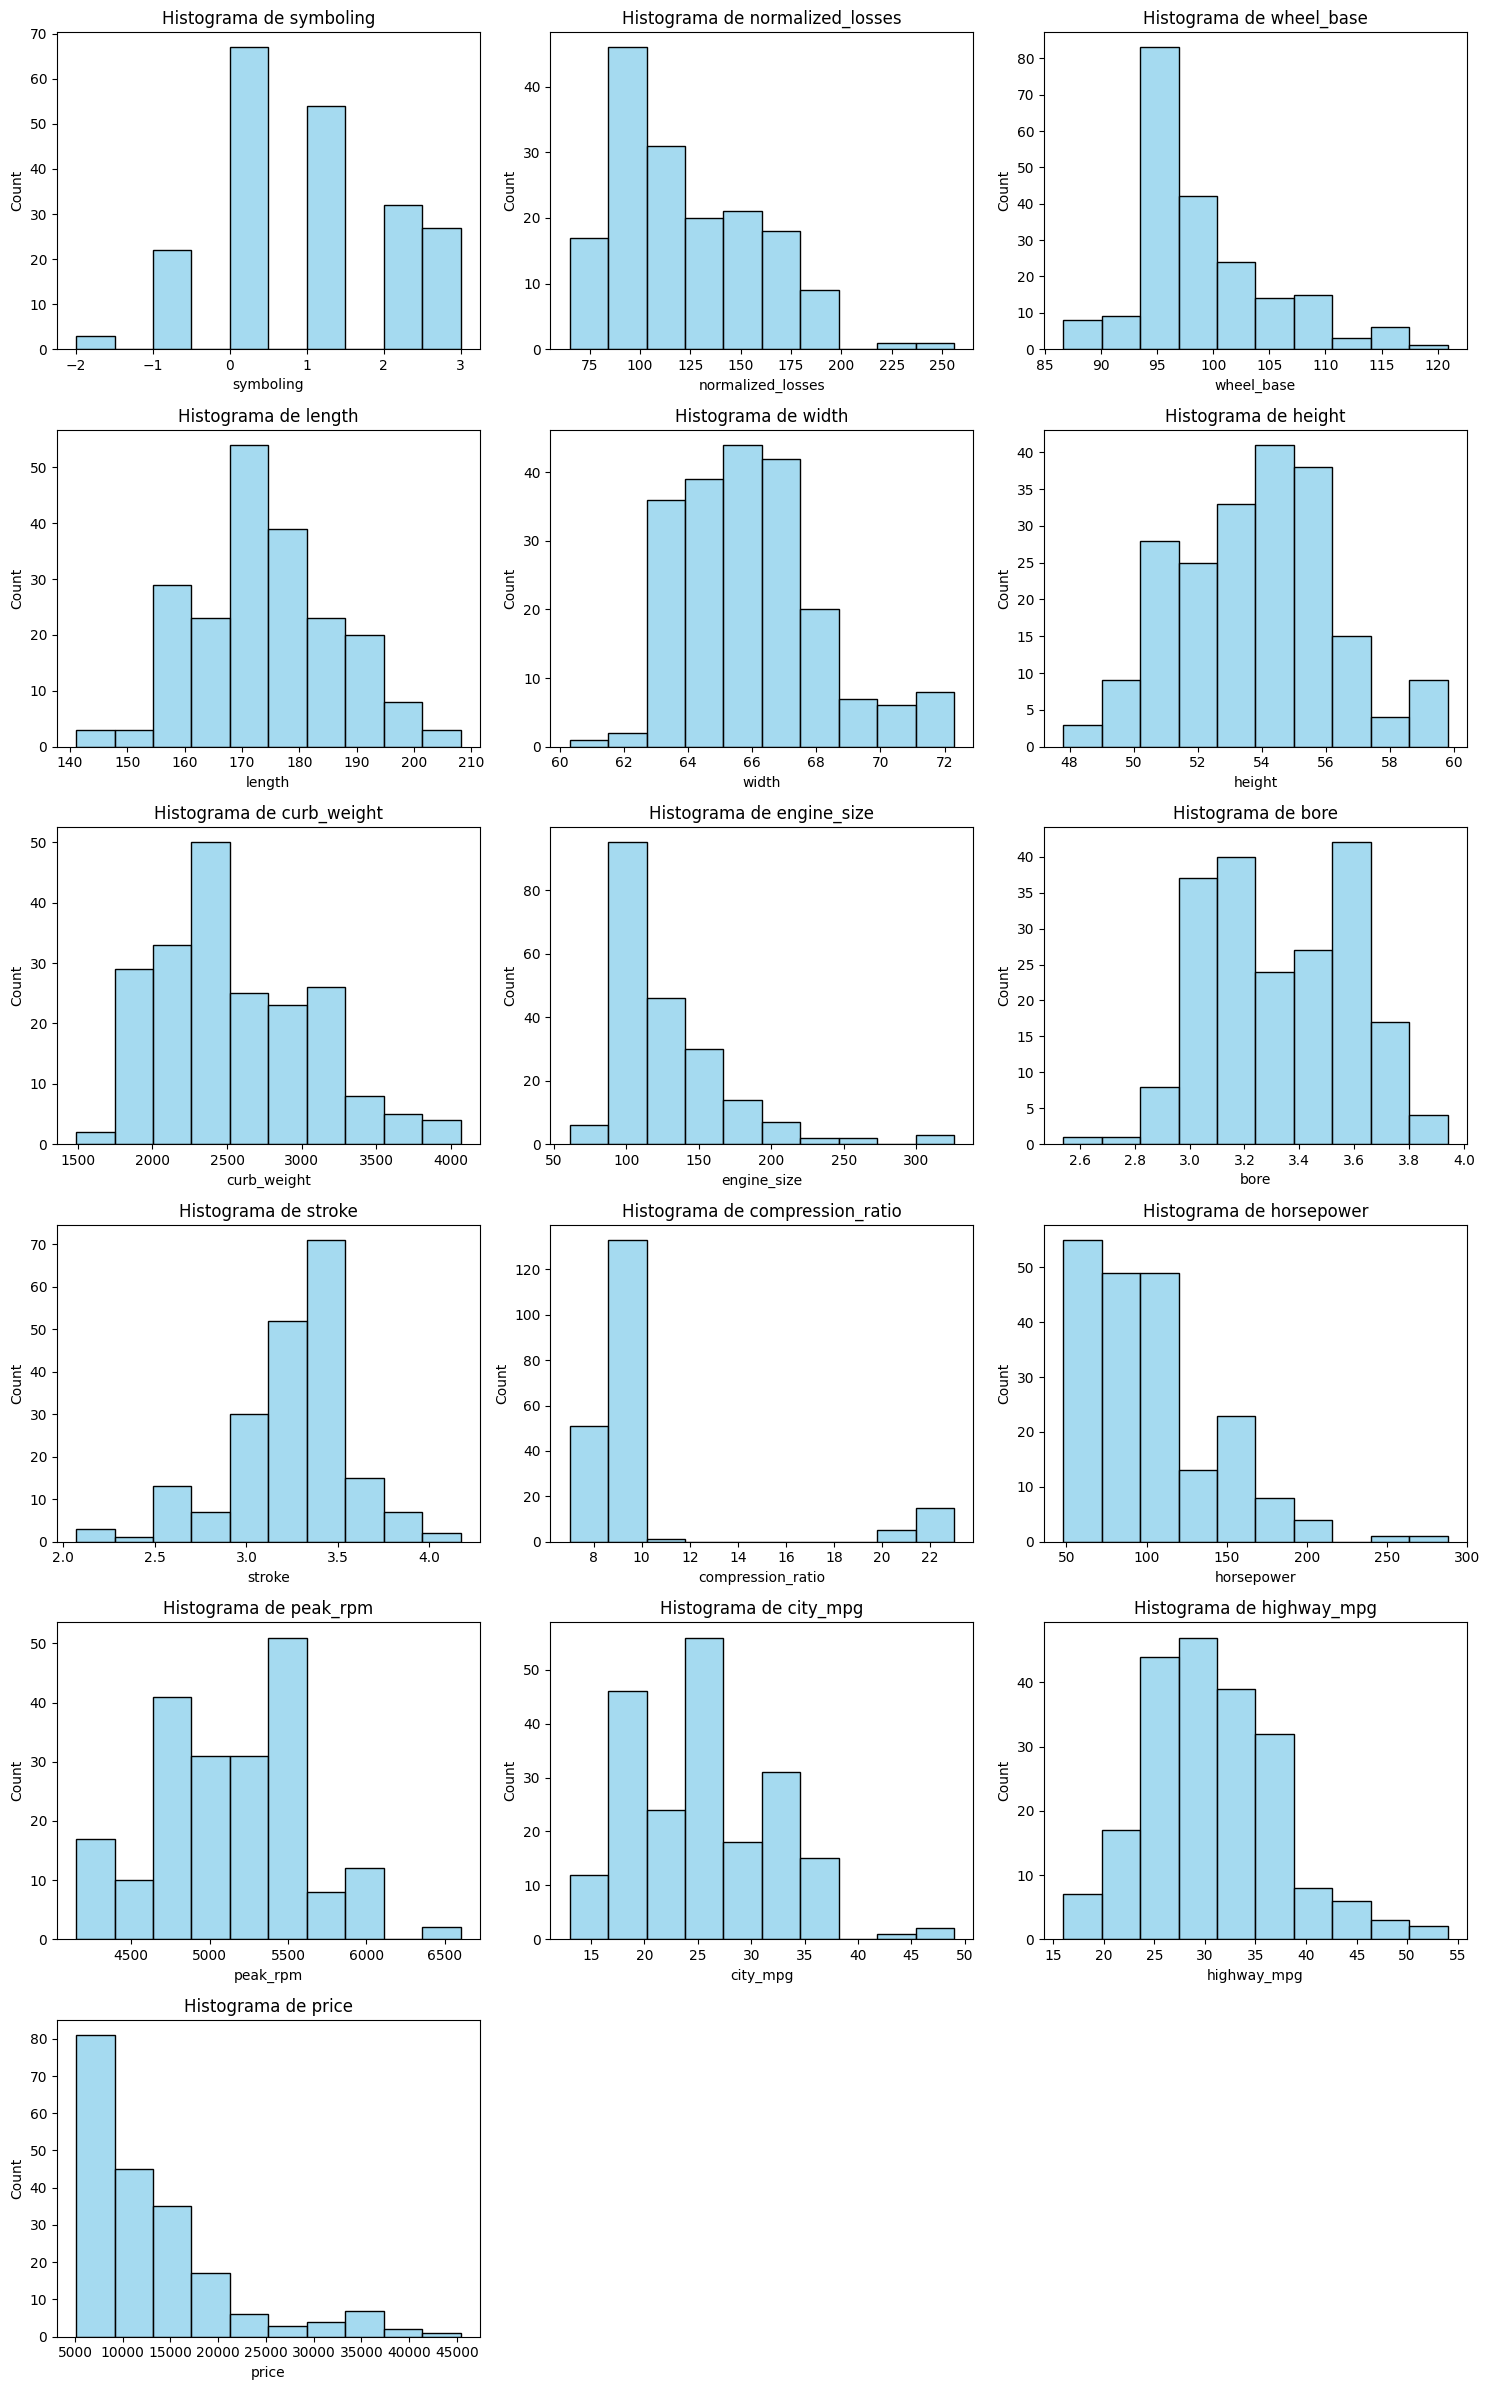

In [48]:
# Separar columnas numéricas y categóricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Imprimir columnas categóricas y numéricas (opcional para verificar)
print("Columnas numéricas:", numerical_columns)
print("Columnas categóricas:", categorical_columns)

# Crear una figura y una cuadrícula de subplots 2x3
rows = (len(numerical_columns) + 2) // 3  # Calcular filas necesarias (3 columnas por fila)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Ajustar tamaño basado en filas
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

# Crear un histograma para cada columna numérica
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=10, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {column}')

# Ocultar subplots vacíos si hay menos de 3*filas columnas
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


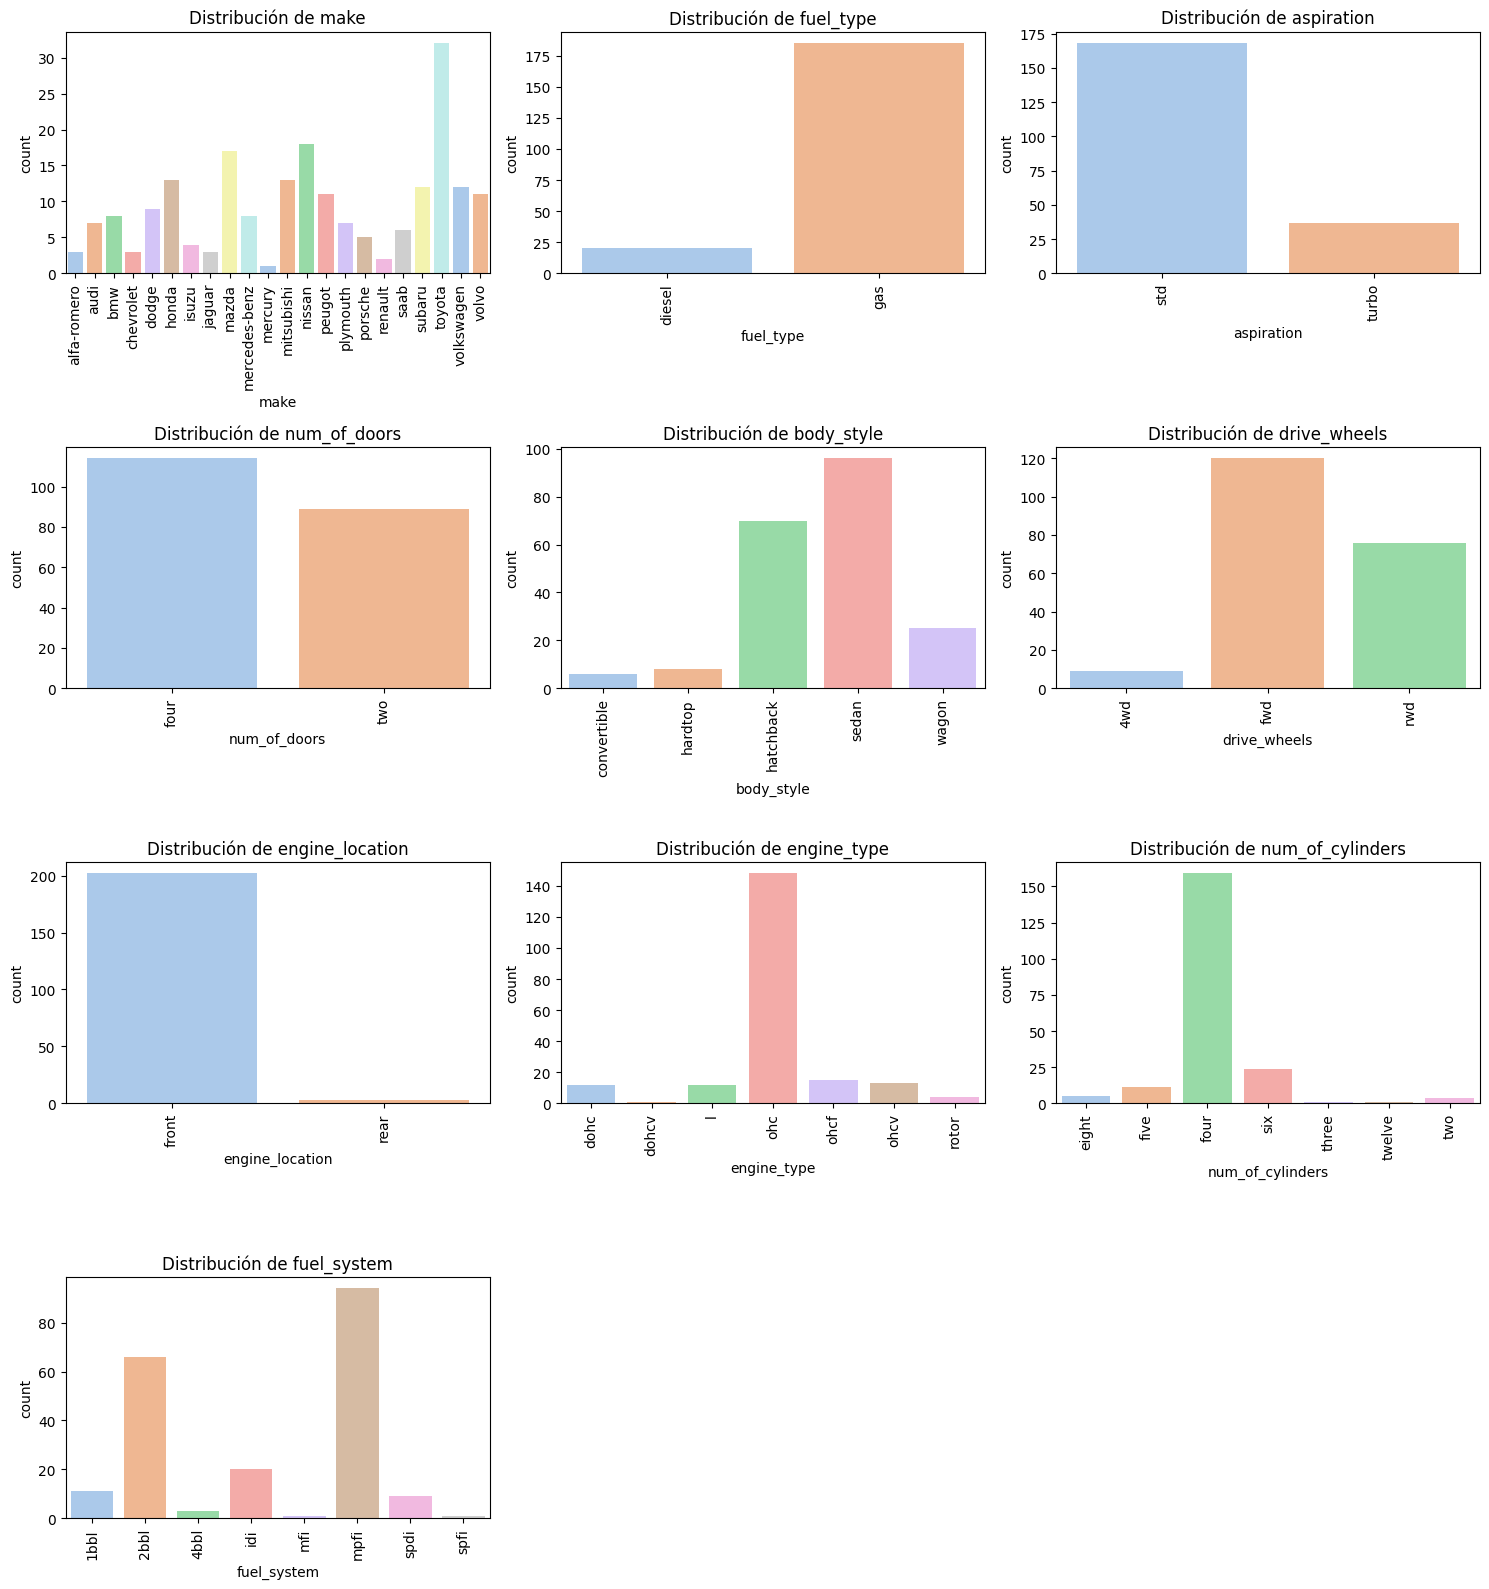

In [49]:
# Filtrar columnas categóricas
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Crear una figura y una cuadrícula de subplots basada en el número de columnas categóricas
rows = (len(categorical_columns) + 2) // 3  # Calcular filas necesarias (3 columnas por fila)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Ajustar tamaño basado en filas
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

# Crear un gráfico de barras para cada columna categórica
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue=column, palette='pastel', legend=False)
    axes[i].set_title(f'Distribución de {column}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x para mejor visibilidad

# Ocultar subplots vacíos si hay menos de 3*filas columnas
for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


### **Detección y tratamiento de valores nulos.**

In [50]:
calculate_null(df)

,datos sin NAs en q,Na en q,Na en %
normalized_losses,164,41,20.00
stroke,201,4,1.95
price,201,4,1.95
bore,201,4,1.95
horsepower,203,2,0.98
peak_rpm,203,2,0.98
num_of_doors,203,2,0.98
symboling,205,0,0.00
fuel_type,205,0,0.00
make,205,0,0.00


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized_losses  164 non-null    float64 
 2   make               205 non-null    category
 3   fuel_type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num_of_doors       203 non-null    category
 6   body_style         205 non-null    category
 7   drive_wheels       205 non-null    category
 8   engine_location    205 non-null    category
 9   wheel_base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb_weight        205 non-null    int64   
 14  engine_type        205 non-null    category
 15  num_of_cylinders   205 non-null    category
 16  engine_s

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized_losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


In [53]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
fuel_type,gas,diesel,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
aspiration,std,turbo,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
num_of_doors,two,four,NaN,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
body_style,convertible,hatchback,sedan,wagon,hardtop,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
drive_wheels,rwd,fwd,4wd,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
engine_location,front,rear,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
engine_type,dohc,ohcv,ohc,l,rotor,ohcf,dohcv,None,None,None,...,None,None,None,None,None,None,None,None,None,None
num_of_cylinders,four,six,five,three,twelve,two,eight,None,None,None,...,None,None,None,None,None,None,None,None,None,None
fuel_system,mpfi,2bbl,mfi,1bbl,spfi,4bbl,idi,spdi,None,None,...,None,None,None,None,None,None,None,None,None,None


In [54]:
# Manejo de valores faltantes (sin usar inplace)
df['normalized_losses'] = df['normalized_losses'].fillna(df['normalized_losses'].median())
df['bore'] = df['bore'].fillna(df['bore'].median())
df['stroke'] = df['stroke'].fillna(df['stroke'].median())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['peak_rpm'] = df['peak_rpm'].fillna(df['peak_rpm'].median())
df['num_of_doors'] = df['num_of_doors'].fillna(df['num_of_doors'].mode()[0])

# Imputar los valores nulos de price con la mediana porque contiene outliers
df['price'] = df['price'].fillna(df['price'].median())

In [55]:
calculate_null(df)

,datos sin NAs en q,Na en q,Na en %
symboling,205,0,0.0
normalized_losses,205,0,0.0
make,205,0,0.0
fuel_type,205,0,0.0
aspiration,205,0,0.0
num_of_doors,205,0,0.0
body_style,205,0,0.0
drive_wheels,205,0,0.0
engine_location,205,0,0.0
wheel_base,205,0,0.0


### **Identificación y tratamiento de outliers.**


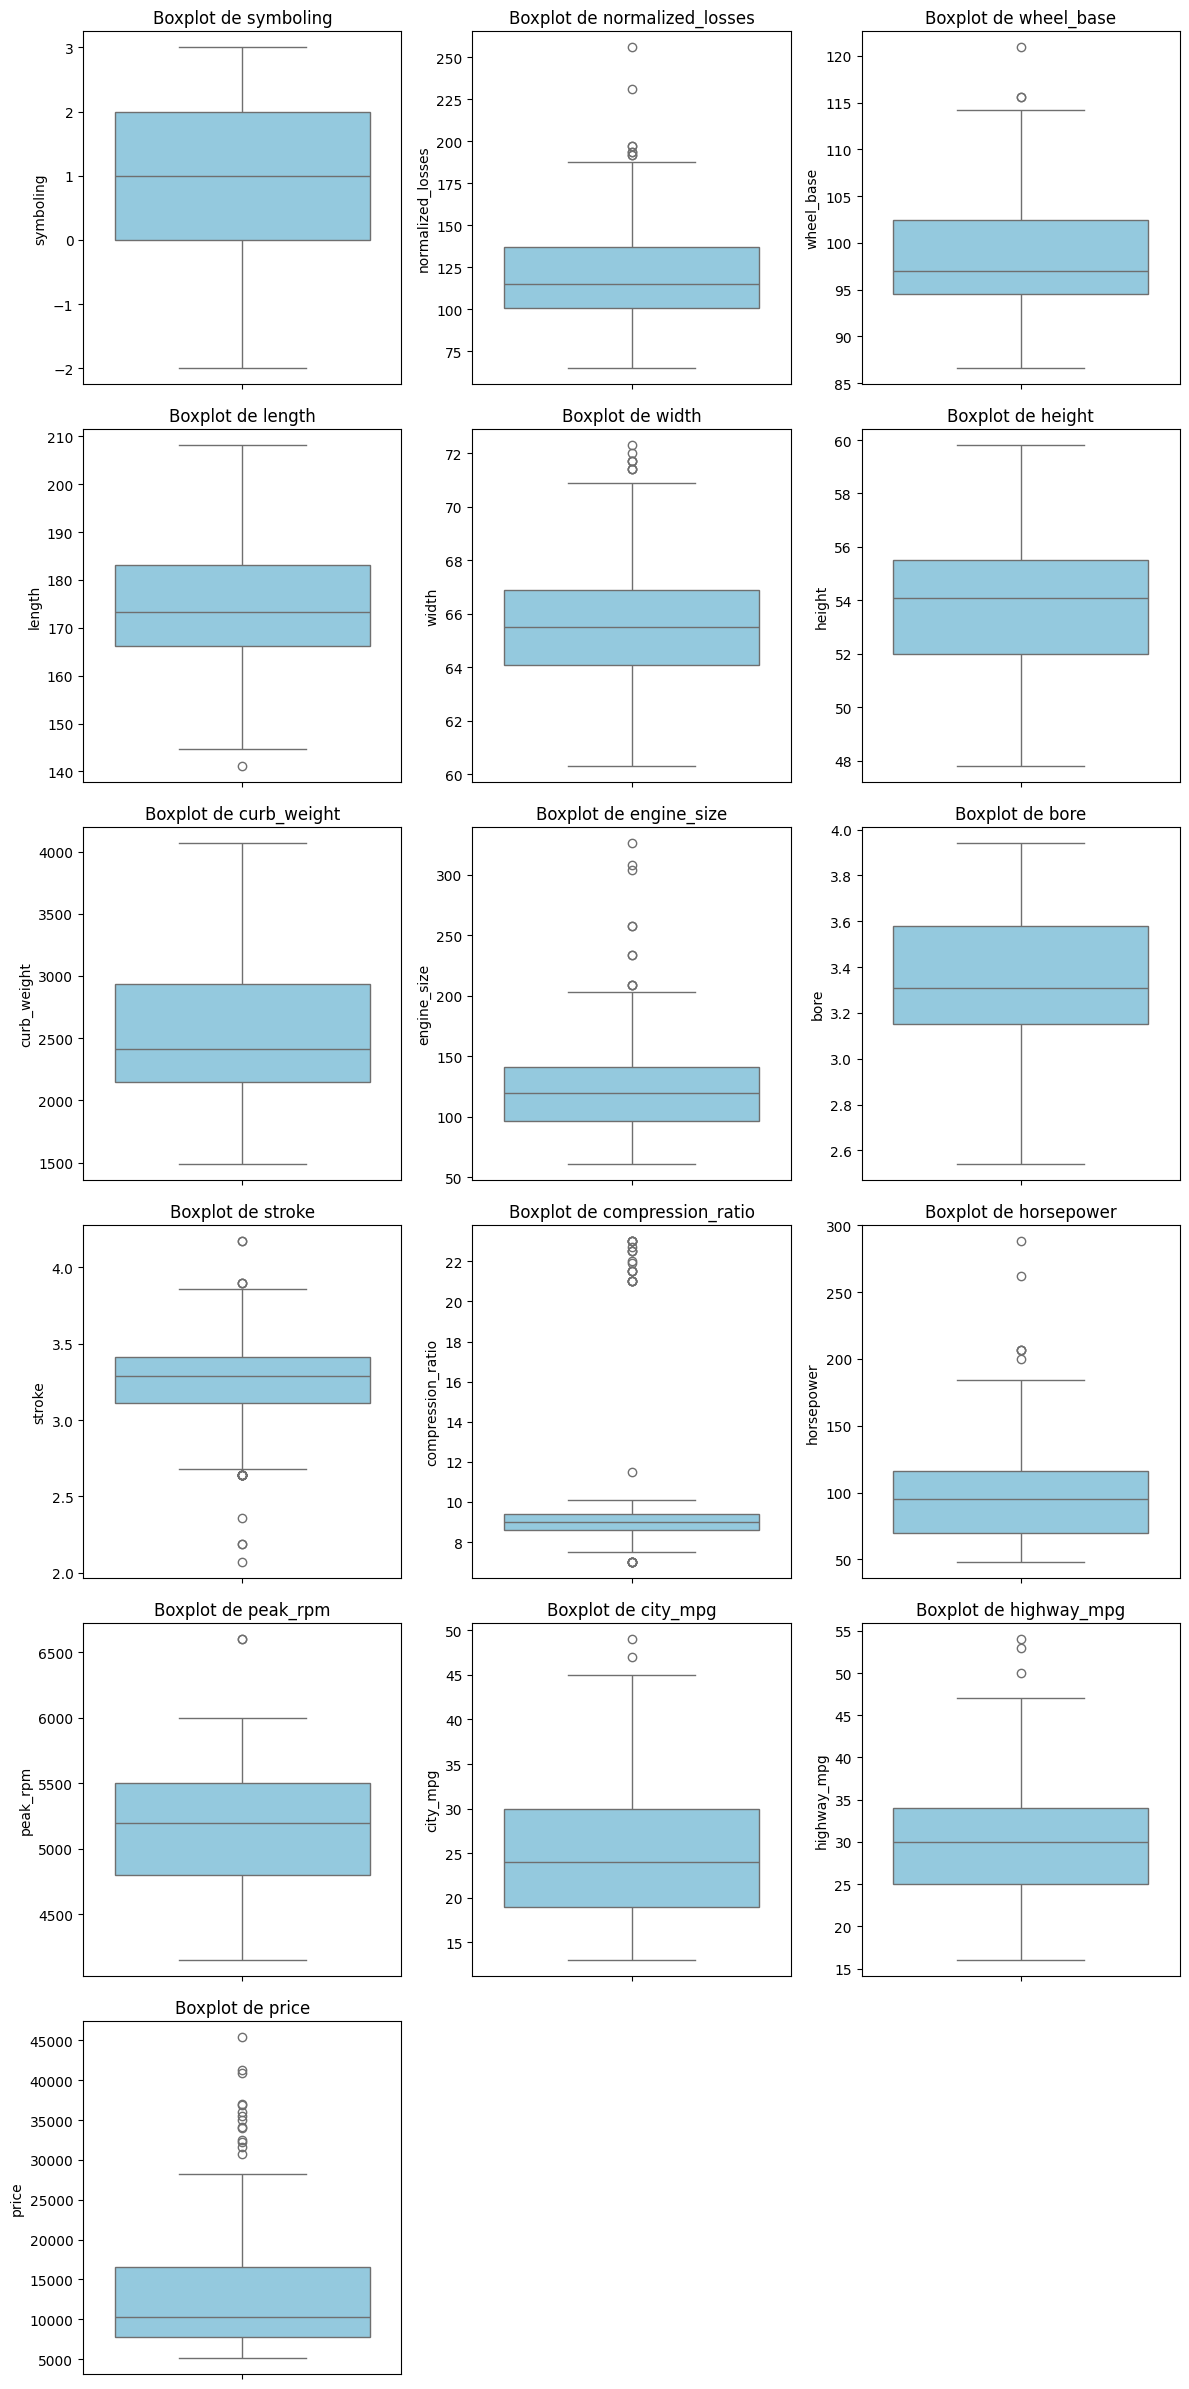

Outliers en la columna symboling: 0 casos
Outliers en la columna normalized_losses: 8 casos
Outliers en la columna wheel_base: 3 casos
Outliers en la columna length: 1 casos
Outliers en la columna width: 8 casos
Outliers en la columna height: 0 casos
Outliers en la columna curb_weight: 0 casos
Outliers en la columna engine_size: 10 casos
Outliers en la columna bore: 0 casos
Outliers en la columna stroke: 20 casos
Outliers en la columna compression_ratio: 28 casos
Outliers en la columna horsepower: 6 casos
Outliers en la columna peak_rpm: 2 casos
Outliers en la columna city_mpg: 2 casos
Outliers en la columna highway_mpg: 3 casos
Outliers en la columna price: 14 casos

Columnas con outliers:
['normalized_losses', 'wheel_base', 'length', 'width', 'engine_size', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [56]:
# Filtrar las columnas numéricas del DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Crear una figura y una cuadrícula de subplots basada en el número de columnas numéricas
rows = (len(numerical_columns) + 2) // 3  # Calcular filas necesarias (3 columnas por fila)
fig, axes = plt.subplots(rows, 3, figsize=(12, rows * 4))  # Ajustar tamaño basado en filas
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

# Calcular IQR para cada columna numérica y crear boxplots
outliers_dict = {}  # Para almacenar los outliers de cada columna
columns_with_outliers = []  # Lista para almacenar los nombres de las columnas con outliers

for i, column in enumerate(numerical_columns):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers  # Guardar los outliers para cada columna

    # Si hay outliers, agregar el nombre de la columna a la lista
    if outliers.shape[0] > 0:
        columns_with_outliers.append(column)

    # Crear el boxplot
    sns.boxplot(y=df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot de {column}')

# Ocultar subplots vacíos si hay menos de 3*filas columnas
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

# Imprimir el número de outliers en cada columna
for column, outliers in outliers_dict.items():
    print(f"Outliers en la columna {column}: {outliers.shape[0]} casos")

# Imprimir la lista de columnas con outliers
print("\nColumnas con outliers:")
print(columns_with_outliers)


In [57]:
# Función para detectar y eliminar outliers usando IQR
def eliminar_outliers_con_IQR(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Eliminar filas con valores fuera de los límites
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    
    return df

# Función para reemplazar outliers con la mediana
def reemplazar_outliers_con_mediana(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Reemplazar outliers por la mediana
        mediana = df[columna].median()
        df[columna] = df[columna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)
    
    return df

# Función para aplicar una transformación logarítmica
def aplicar_transformacion_logaritmica(df, columnas):
    for columna in columnas:
        df[columna] = np.log1p(df[columna])  # log1p aplica log(x+1), útil para valores cero
    return df

# Reemplazar outliers o aplicar transformaciones en columnas específicas
def tratar_outliers(df):
    # Columnas a tratar
    columnas_con_outliers_IQR = ['normalized_losses', 'wheel_base', 'length', 'width', 'stroke', 
                                 'compression_ratio', 'peak_rpm', 'city_mpg', 'highway_mpg']
    columnas_con_outliers_mediana = ['engine_size', 'horsepower']
    columnas_con_transformacion_log = ['price']
    
    # Eliminar o reemplazar outliers usando IQR
    df = eliminar_outliers_con_IQR(df, columnas_con_outliers_IQR)
    
    # Reemplazar outliers con la mediana
    df = reemplazar_outliers_con_mediana(df, columnas_con_outliers_mediana)
    
    # Aplicar una transformación logarítmica
    df = aplicar_transformacion_logaritmica(df, columnas_con_transformacion_log)
    
    return df

# Llamar a la función para tratar los outliers en el DataFrame
df_limpio = tratar_outliers(df)

# Mostrar las primeras filas del DataFrame limpio
df_limpio.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,9.510149
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,9.711176
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,9.711176
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,9.543306
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,9.767152


### **Análisis de correlación entre variables.**

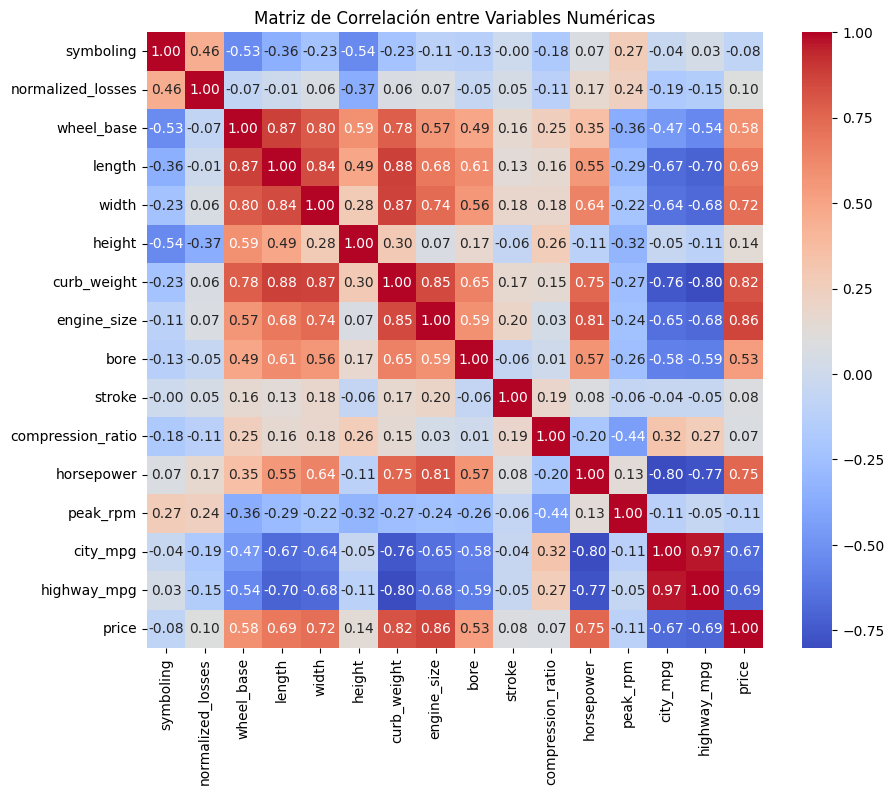

In [58]:
# Filtrar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

## **Parte 2: Preparación de Datos**

 **2. Preprocesamiento:**

 * Selección de características importantes.
 * Transformación de variables categóricas.
 * División del conjunto de datos en entrenamiento y prueba.
 * Escalado de características.

In [59]:
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

price                1.000000
engine_size          0.860343
curb_weight          0.819817
horsepower           0.749919
width                0.724558
length               0.686567
wheel_base           0.584847
bore                 0.532861
height               0.140439
normalized_losses    0.095489
stroke               0.083627
compression_ratio    0.072890
symboling           -0.080149
peak_rpm            -0.107283
city_mpg            -0.668822
highway_mpg         -0.693037
Name: price, dtype: float64


In [60]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')


In [61]:
# Calcular la media de 'price' para cada categoría para determinar si esa caracteristica influye en la variable objetivo
for col in categorical_columns:
    print(f"Media de 'price' por {col}:")
    print(df.groupby(col)['price'].mean())
    print("\n")


Media de 'price' por make:
make
alfa-romero      15498.333333
audi             16778.571429
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             9605.750000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          27179.400000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64


Media de 'price' por fuel_type:
fuel_type
diesel    15838.15000
gas       12859.72973
Name: price, dtype: float64


Media de 'price' por aspiration:
aspiration
std      12502.053571
turbo    16093.729730
Name: price, dtype: float64


Media de 'price' por num_of_doors:
num_of_do

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_7652\1110485937.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['price'].mean())


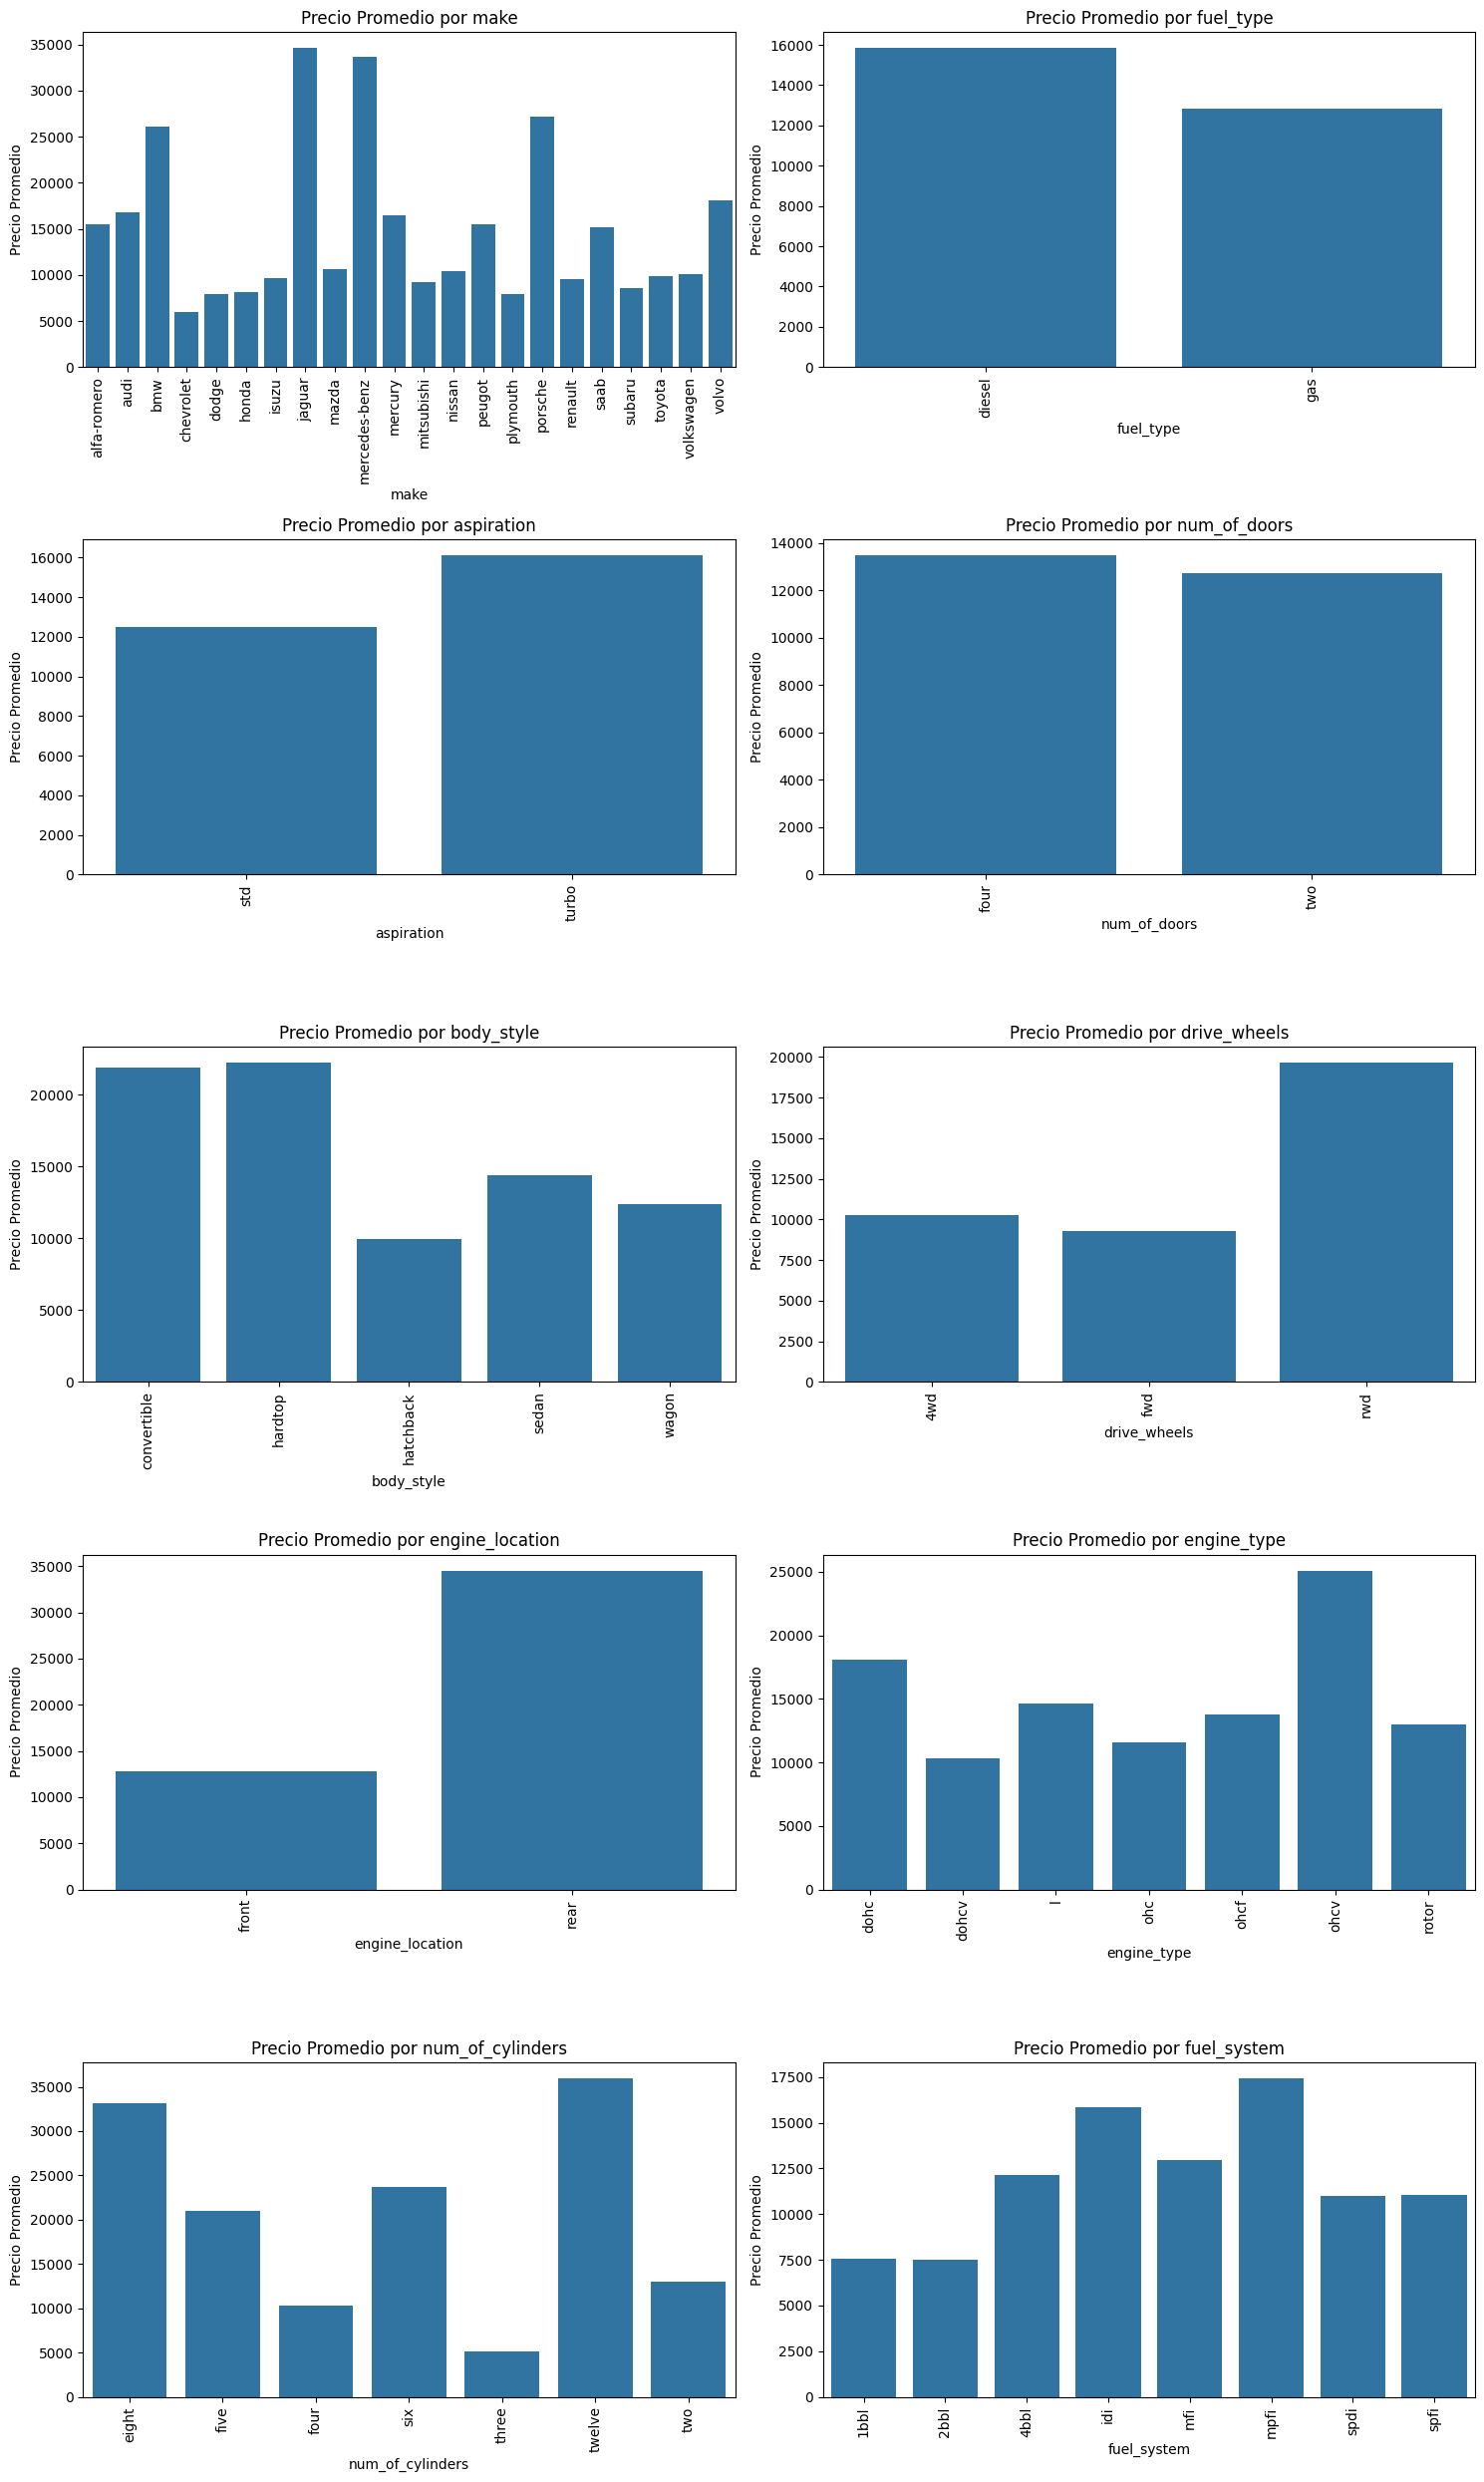

In [62]:
# Lista de columnas categóricas
categorical_columns = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
                       'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']

# Número de columnas en la cuadrícula de gráficos
num_columns = 2
num_rows = math.ceil(len(categorical_columns) / num_columns)

# Crear subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()

# Crear gráficos para cada columna categórica
for i, col in enumerate(categorical_columns):
    sns.barplot(ax=axes[i], x=col, y='price', data=df, estimator='mean', errorbar=None)

    # Personalización del gráfico
    axes[i].set_title(f'Precio Promedio por {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Precio Promedio')
    axes[i].tick_params(axis='x', rotation=90)

# Si hay gráficos vacíos, los desactivamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar espaciado entre gráficos
plt.tight_layout()
plt.show()


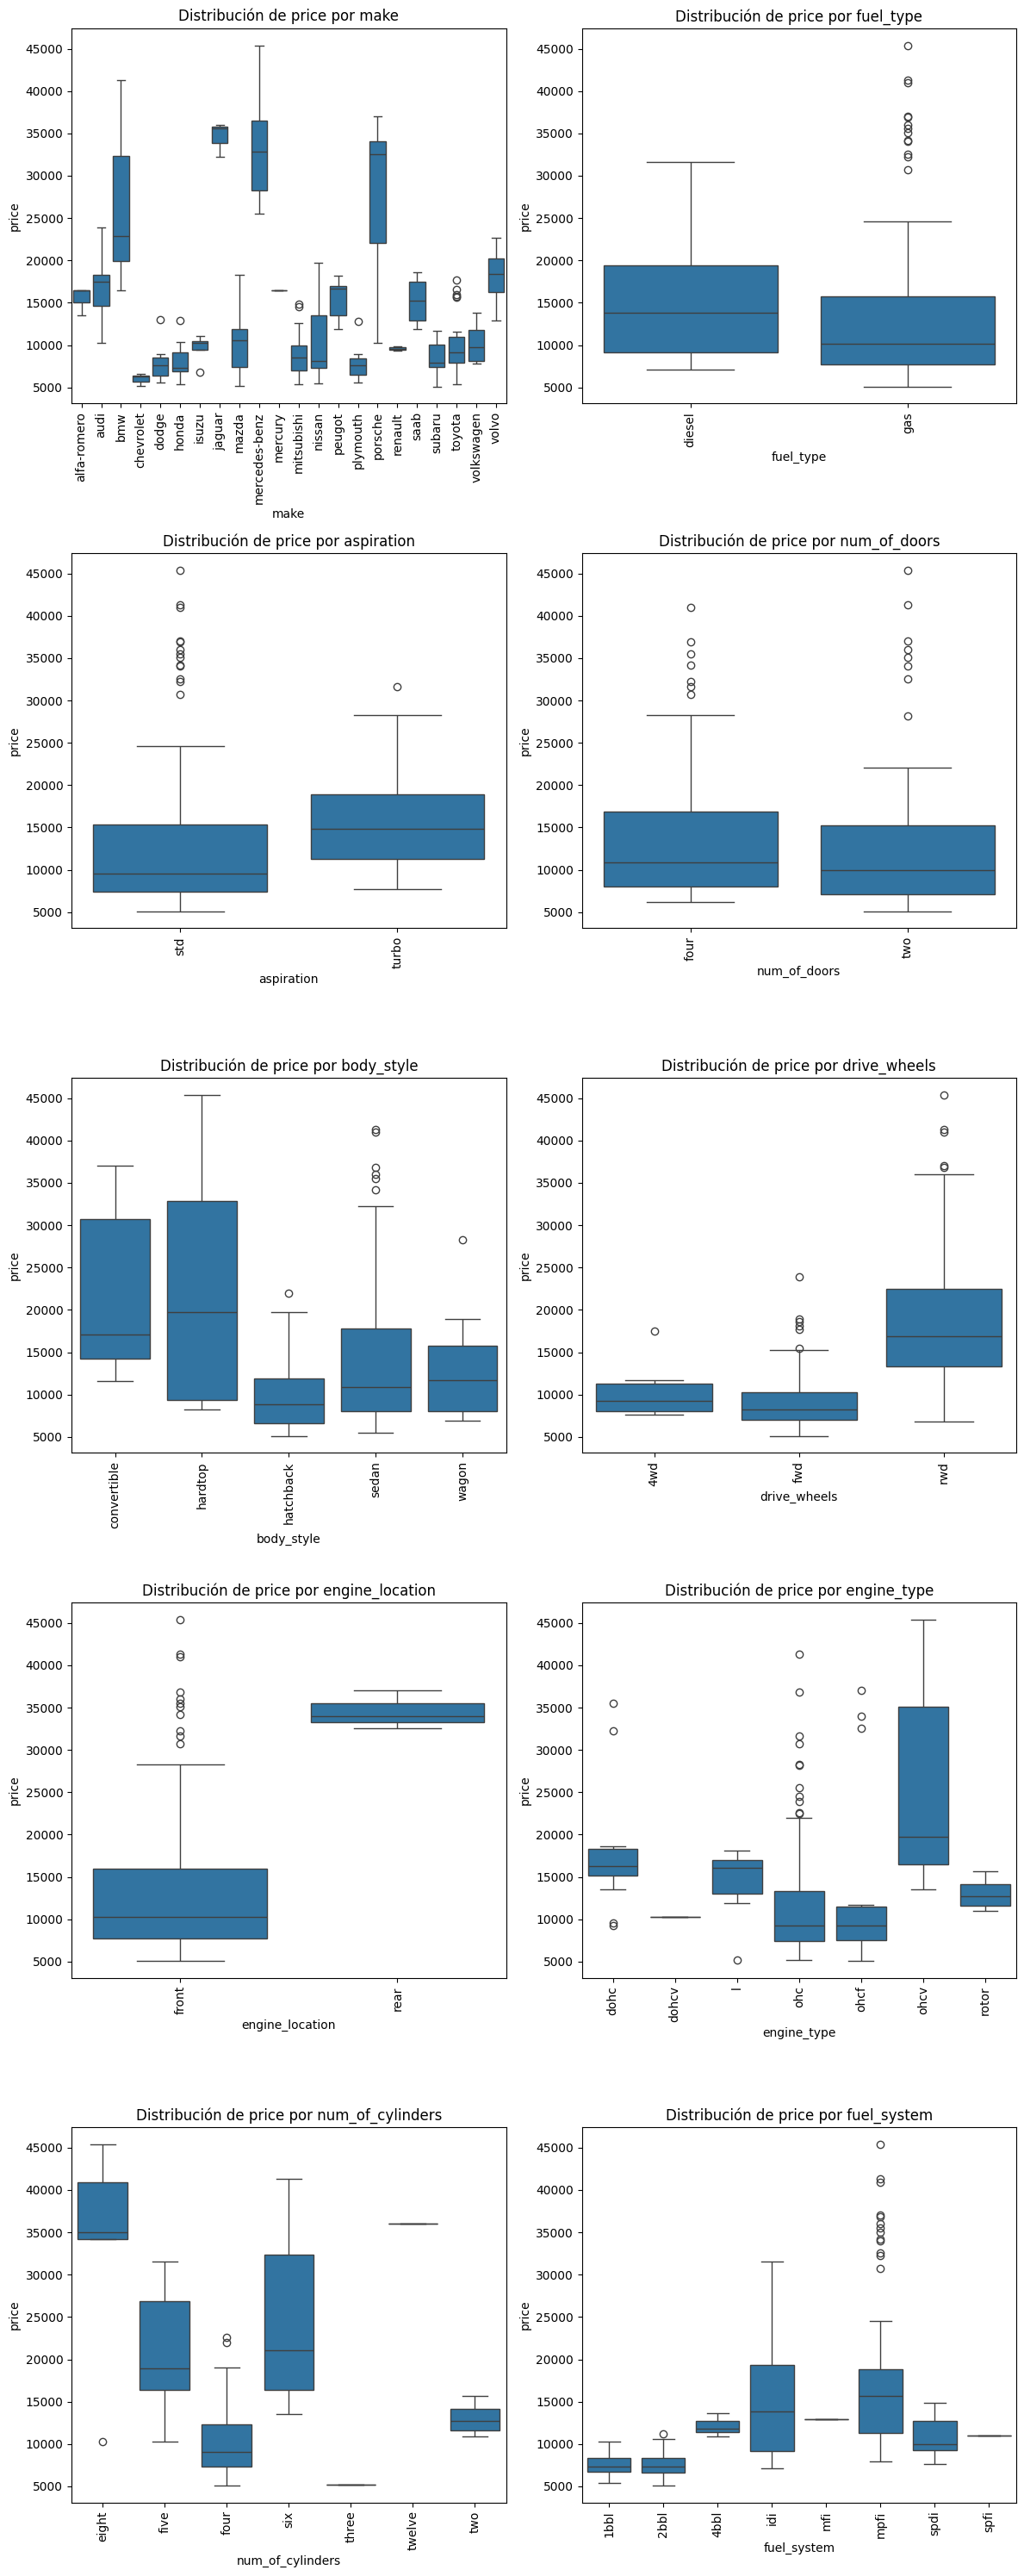

In [63]:
# Boxplots para cada característica
categorical_columns = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 
                       'body_style', 'drive_wheels', 'engine_location', 
                       'engine_type', 'num_of_cylinders', 'fuel_system']

# Definir el número de filas y columnas
n_cols = 2  # Número de columnas
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calcular filas necesarias

# Crear una figura y los subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

# Aplanar los ejes para facilitar la iteración (en caso de que haya más de 1 fila)
axes = axes.flatten()

# Crear los boxplots y asignarlos a cada subplot
for i, col in enumerate(categorical_columns):
    sns.boxplot(data=df, x=col, y='price', ax=axes[i])  # Usar el eje adecuado
    axes[i].set_title(f'Distribución de price por {col}')
    axes[i].tick_params(axis='x', rotation=90) 

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized_losses  205 non-null    float64 
 2   make               205 non-null    category
 3   fuel_type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num_of_doors       205 non-null    category
 6   body_style         205 non-null    category
 7   drive_wheels       205 non-null    category
 8   engine_location    205 non-null    category
 9   wheel_base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb_weight        205 non-null    int64   
 14  engine_type        205 non-null    category
 15  num_of_cylinders   205 non-null    category
 16  engine_s

In [65]:
# 1. **Label Encoding** para columnas con solo dos categorías
# Esto asigna un valor 0 o 1 a las categorías
le = LabelEncoder()

# Transformación de la columna 'fuel_type' (gas, diesel)
df['fuel_type'] = le.fit_transform(df['fuel_type'])

# Transformación de la columna 'aspiration' (std, turbo)
df['aspiration'] = le.fit_transform(df['aspiration'])

# Transformación de la columna 'num_of_doors' (four, two)
df['num_of_doors'] = le.fit_transform(df['num_of_doors'])

# Transformación de la columna 'engine_location' (front, rear)
df['engine_location'] = le.fit_transform(df['engine_location'])

# Transformación de la columna 'drive_wheels' (rwd, fwd, 4wd)
df['drive_wheels'] = le.fit_transform(df['drive_wheels'])

# 2. **One-Hot Encoding** para columnas con múltiples categorías (nominales)
# Esto crea columnas adicionales, una para cada categoría

# Aplicar One-Hot Encoding a las columnas 'make', 'body_style' y 'engine_type'
# drop_first=True para evitar multicolinealidad
df = pd.get_dummies(df, columns=['make', 'body_style', 'engine_type','fuel_system'], drop_first=True)

# 3. **Manejo de variables ordinales** (si es necesario)
# Para la columna 'num_of_cylinders' que es ordinal (con un orden implícito)
# Creamos un mapeo personalizado para los valores
cylinders_mapping = {'two': 1, 'three': 2, 'four': 3, 'five': 4, 'six': 5, 'eight': 6, 'twelve': 7}
df['num_of_cylinders'] = df['num_of_cylinders'].map(cylinders_mapping)

# Imprimir el DataFrame transformado
df.head()


,symboling,normalized_losses,fuel_type,aspiration,num_of_doors,drive_wheels,engine_location,wheel_base,length,width,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,115.0,1,0,1,2,0,88.6,168.8,64.1,...,False,False,False,False,False,False,False,True,False,False
1,3,115.0,1,0,1,2,0,88.6,168.8,64.1,...,False,False,False,False,False,False,False,True,False,False
2,1,115.0,1,0,1,2,0,94.5,171.2,65.5,...,False,True,False,False,False,False,False,True,False,False
3,2,164.0,1,0,0,1,0,99.8,176.6,66.2,...,False,False,False,False,False,False,False,True,False,False
4,2,164.0,1,0,0,0,0,99.4,176.6,66.4,...,False,False,False,False,False,False,False,True,False,False


In [66]:
# Definir la variable objetivo y las características
X = df.drop('price', axis=1)  # Características (sin la columna 'price')
y = df['price']  # Variable objetivo ('price')

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar las características de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar las características de prueba usando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Convertir las matrices escaladas de vuelta a DataFrames con los nombres de las columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Imprimir los primeros registros para verificar
X_train_scaled_df.head()


,symboling,normalized_losses,fuel_type,aspiration,num_of_doors,drive_wheels,engine_location,wheel_base,length,width,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,0.4,0.261780,0.0,0.0,0.0,1.0,0.0,0.631034,0.524138,0.409524,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.4,0.502618,1.0,0.0,0.0,1.0,0.0,0.734483,0.725862,0.628571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.4,0.062827,1.0,0.0,0.0,0.5,0.0,0.313793,0.432759,0.171429,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6,0.298429,1.0,0.0,0.0,0.5,0.0,0.272414,0.356897,0.190476,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.214660,1.0,0.0,1.0,0.5,0.0,0.341379,0.394828,0.323810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# -----------------------------------------------------------

In [67]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular correlaciones con la variable objetivo 'price'
correlation_matrix = numeric_df.corr()

# Mostrar las correlaciones con la columna 'price'
if 'price' in correlation_matrix:
    print(correlation_matrix['price'].sort_values(ascending=False))
else:
    print("La columna 'price' no está presente en el DataFrame numérico.")


price                1.000000
engine_size          0.860343
curb_weight          0.819817
horsepower           0.749919
width                0.724558
length               0.686567
wheel_base           0.584847
drive_wheels         0.580367
bore                 0.532861
engine_location      0.331459
aspiration           0.175745
height               0.140439
normalized_losses    0.095489
stroke               0.083627
compression_ratio    0.072890
num_of_doors        -0.046497
symboling           -0.080149
peak_rpm            -0.107283
fuel_type           -0.112439
city_mpg            -0.668822
highway_mpg         -0.693037
Name: price, dtype: float64


## **Parte 3: Modelos de Regresión**

**1. Regresión Lineal:**
  * Entrenamiento del modelo.
  * Evaluación del rendimiento (MSE y R²).
 
**2. K-Nearest Neighbors (KNN):**
  * Entrenamiento del modelo.
  * Evaluación del rendimiento (MSE y R²).

**3. Árbol de Decisión:**
  * Entrenamiento del modelo.
  * Evaluación del rendimiento (MSE y R²).


### **1. Regresión Lineal:**
  * Entrenamiento del modelo.
  * Evaluación del rendimiento (MSE y R²).
 


Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 2074.666086166481
Error cuadrático medio (MSE): 10359606.850265969
Coeficiente de determinación (R²): 0.8679352830581134


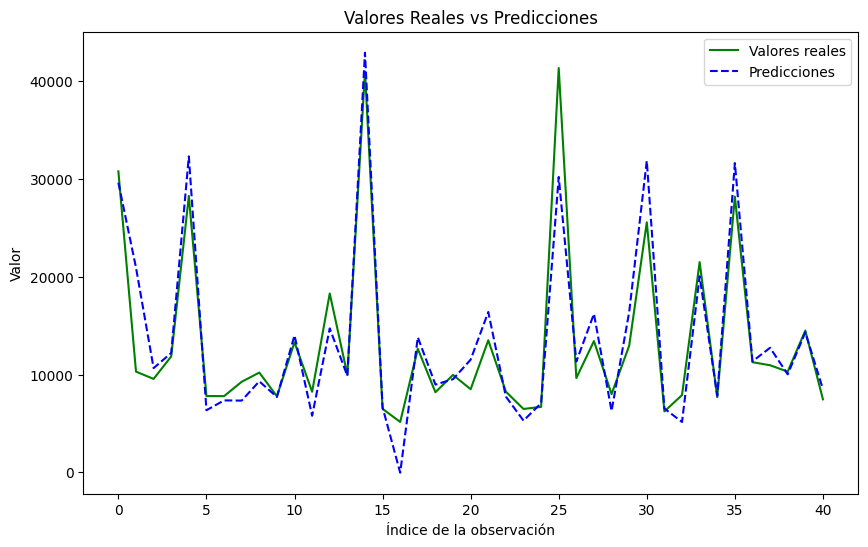

In [68]:
# Inicializar el modelo de Regresión Lineal
modelo_lr = LinearRegression()

# Entrenar el modelo
modelo_lr.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_lr = modelo_lr.predict(X_test)

# Calcular MSE y R²
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae_lr}")
print(f"Error cuadrático medio (MSE): {mse_lr}")
print(f"Coeficiente de determinación (R²): {r2_lr}")

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Valores reales', color='green')
plt.plot(np.arange(len(y_test)), y_pred_lr, label='Predicciones', color='blue', linestyle='--')
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Índice de la observación')
plt.ylabel('Valor')
plt.legend()
plt.show()

### **2. K-Nearest Neighbors (KNN):**
  * Entrenamiento del modelo.
  * Evaluación del rendimiento (MSE y R²).



Resultados en el conjunto de prueba para KNN:
Error absoluto medio (MAE): 2349.2195121951218
Error cuadrático medio (MSE): 15176459.414634146
Coeficiente de determinación (R²): 0.8065298378845108


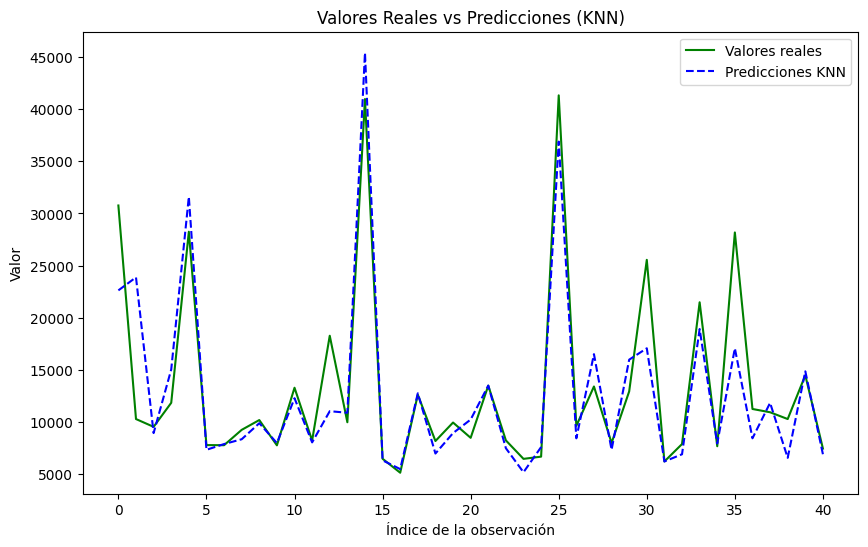

In [69]:
# Inicializar el modelo KNN con un valor de k
k = 1
modelo_knn = KNeighborsRegressor(n_neighbors=k)

# Entrenar el modelo KNN
modelo_knn.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_knn = modelo_knn.predict(X_test)

# Calcular MSE, MAE y R² para KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Imprimir los resultados de la evaluación
print("Resultados en el conjunto de prueba para KNN:")
print(f"Error absoluto medio (MAE): {mae_knn}")
print(f"Error cuadrático medio (MSE): {mse_knn}")
print(f"Coeficiente de determinación (R²): {r2_knn}")

# Crear el gráfico de línea para KNN
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Valores reales', color='green')
plt.plot(np.arange(len(y_test)), y_pred_knn, label='Predicciones KNN', color='blue', linestyle='--')
plt.title('Valores Reales vs Predicciones (KNN)')
plt.xlabel('Índice de la observación')
plt.ylabel('Valor')
plt.legend()
plt.show()


### **3. Árbol de Decisión:**
  * Entrenamiento del modelo.
  * Evaluación del rendimiento (MSE y R²).

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 1767.0731707317073
Error cuadrático medio (MSE): 6499267.024390244
Coeficiente de determinación (R²): 0.9171470624019097


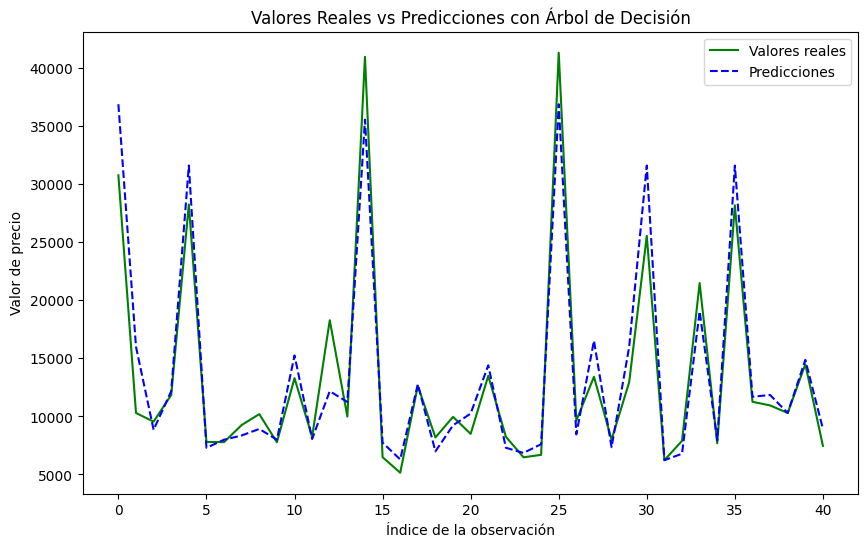

In [70]:
# Inicializar el modelo de Árbol de Decisión
modelo_dt = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_dt.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_dt = modelo_dt.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
mae_dt = mean_absolute_error(y_test, y_pred_dt)  # Error absoluto medio
mse_dt = mean_squared_error(y_test, y_pred_dt)  # Error cuadrático medio
r2_dt = r2_score(y_test, y_pred_dt)  # Coeficiente de determinación R²

# Mostrar los resultados de evaluación
print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae_dt}")
print(f"Error cuadrático medio (MSE): {mse_dt}")
print(f"Coeficiente de determinación (R²): {r2_dt}")

# Visualizar los valores reales vs las predicciones
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Valores reales', color='green')
plt.plot(np.arange(len(y_test)), y_pred_dt, label='Predicciones', color='blue', linestyle='--')
plt.title('Valores Reales vs Predicciones con Árbol de Decisión')
plt.xlabel('Índice de la observación')
plt.ylabel('Valor de precio')
plt.legend()
plt.show()


## **Parte 4: Benchmarking y Comparación de Modelos**

 **1. Comparación de Modelos:**
* Comparar los resultados de los tres modelos en términos de MSE y R².
* Discusión sobre las diferencias en el rendimiento de los modelos.
* Conclusión

 **2. Interpretación de Resultados:**
* Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
* Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.
* Tareas Adicionales y Desafíos

 **3. Desafíos Adicionales:**
* Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
* Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
* Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.
* Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

In [71]:
# Crear los modelos
models = {
    'Linear Regression': LinearRegression(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

# Entrenar y evaluar los modelos
results = {}
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir con el conjunto de prueba
    y_pred = model.predict(X_test)
    # Calcular el MSE y R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R²': r2}

# Mostrar los resultados
for model_name, result in results.items():
    print(f"{model_name} -> MSE: {result['MSE']}, R²: {result['R²']}")


Linear Regression -> MSE: 10359606.850265969, R²: 0.8679352830581134
KNeighbors Regressor -> MSE: 21007754.91414634, R²: 0.7321922302244476
Decision Tree Regressor -> MSE: 6658797.609756097, R²: 0.9151133595882384


Conclusión: Si, el árbol de decisión tiene un MSE más bajo y un R² más alto que los otros modelos, entonces podría ser el más adecuado para predecir el precio de autos.

In [72]:
# Definir los hiperparámetros para el KNN
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Crear GridSearchCV para KNN
grid_search_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

# Mejor parámetro para KNN
print(f"Mejores parámetros KNN: {grid_search_knn.best_params_}")

# Definir los hiperparámetros para el Decision Tree
dt_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

# Crear GridSearchCV para el Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

# Mejor parámetro para Decision Tree
print(f"Mejores parámetros Decision Tree: {grid_search_dt.best_params_}")


Mejores parámetros KNN: {'n_neighbors': 5, 'weights': 'distance'}
Mejores parámetros Decision Tree: {'max_depth': 5, 'min_samples_split': 10}


In [73]:
# Validación cruzada para el modelo de regresión lineal
cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores for Linear Regression: {cv_scores}")

# Puedes hacer lo mismo para los otros modelos


Cross-validation scores for Linear Regression: [-36318564.04230252 -14576311.19238125 -27731277.79706812
 -68624187.05447412 -33191992.83296555]
